# Hydroponics K-Nearest Neighbor

### Importing of libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import time
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

### Loading of CSV Data

In [2]:
acc_df = pd.read_csv("MOCK_DATA.csv")
acc_df.fillna(0, inplace = True)
acc_df['Acceptable'] = True
unacc_df = pd.read_csv("MOCK_DATA-1.csv")
unacc_df.fillna(0, inplace = True)
unacc_df['Acceptable'] = False

### Acceptable Values DataFrame

In [3]:
acc_df

,pH_level,ec_level,area_of_lettuce,Acceptable
0,5.8,939.03,39.53,True
1,6.6,867.49,31.21,True
2,6.5,843.29,37.90,True
3,6.5,911.27,45.60,True
4,6.6,856.50,42.65,True
...,...,...,...,...
995,5.3,837.40,40.73,True
996,6.8,921.81,39.80,True
997,5.4,945.17,48.98,True
998,6.1,919.46,34.16,True


### Unacceptable Values DataFrame

In [4]:
unacc_df

,pH_level,ec_level,area_of_lettuce,Acceptable
0,12.07,1058.45,70.71,False
1,10.92,1063.44,60.03,False
2,12.44,1107.75,56.60,False
3,2.72,284.13,23.34,False
4,3.21,690.35,15.31,False
...,...,...,...,...
995,7.08,1030.95,53.12,False
996,10.74,1006.76,61.23,False
997,1.99,279.23,13.76,False
998,7.57,1195.12,72.20,False


### Combined DataFrame

In [5]:
df = acc_df.append(unacc_df, ignore_index=True)
df

,pH_level,ec_level,area_of_lettuce,Acceptable
0,5.80,939.03,39.53,True
1,6.60,867.49,31.21,True
2,6.50,843.29,37.90,True
3,6.50,911.27,45.60,True
4,6.60,856.50,42.65,True
...,...,...,...,...
1995,7.08,1030.95,53.12,False
1996,10.74,1006.76,61.23,False
1997,1.99,279.23,13.76,False
1998,7.57,1195.12,72.20,False


### Separation of training and testing set

In [6]:
X = df.loc[:, df.columns != 'Acceptable']
y = df.loc[:, df.columns == 'Acceptable']
start1 = time.time()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

### Scaling of features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float32))
X_test = scaler.transform(X_test.astype(np.float32))

### Training of model

In [8]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train.values.ravel())
acc = model.score(X_test, y_test.values.ravel())
stop1 = time.time()

### Classification report and model accuracy


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       205
        True       0.99      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

MODEL ACCURACY: 99.75%

TRAINING TIME: 0.09s

CONFUSION MATRIX:


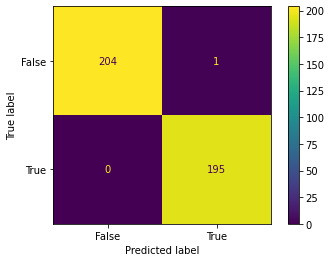

In [9]:
y_pred = model.predict(X_test)
classification_report = classification_report(y_test, y_pred)
accuracy = model.score(X_test, y_test)
disp = plot_confusion_matrix(model, X_test, y_test)
print(disp)
print()
print("CLASSIFICATION REPORT")
print(classification_report)
print(f"MODEL ACCURACY: {round(acc * 100, 2)}%")
print()
print(f"TRAINING TIME: {round(stop1 - start1,2)}s")
print()
print("CONFUSION MATRIX:")

### User input for prediction

In [10]:
pH_level = float(input('Input pH Level: '))
ec_level = float(input('Input EC Level: '))
area_of_lettuce = float(input('Input Area of Lettuce: '))

Input pH Level: 12.07
Input EC Level: 1107.75
Input Area of Lettuce: 15.31


### Preprocessing of user input

In [11]:
inputs = [[pH_level, ec_level, area_of_lettuce]]
new_inputs = scaler.transform(inputs)
new_inputs = pd.DataFrame(new_inputs, columns=(df.columns[0:3]))

### Predicting the user input

In [12]:
start2 = time.time()
pred = model.predict(new_inputs)
stop2 = time.time()
print()
print(f"INPUTS: pH Level = {pH_level}, EC Level = {ec_level}, Area of Lettuce = {area_of_lettuce}")
print(f"PREDICTION: ACCEPTABLE = {pred}")
print(f"PREDICTION TIME: {start2 - stop2} s")
if pred:
    print()
    print("ACTION: CLOSE VALVE")
else:
    print()
    print("ACTION: OPEN VALVE")


INPUTS: pH Level = 12.07, EC Level = 1107.75, Area of Lettuce = 15.31
PREDICTION: ACCEPTABLE = [ True]
PREDICTION TIME: -0.003986835479736328 s

ACTION: CLOSE VALVE


### Reading a new CSV file and predicting acceptable values

In [13]:
filename = str(input("Input CSV File Name: "))
new_df = pd.read_csv(filename)
new_df.fillna(0, inplace = True)
arr1 = []
arr2 = []
for i in new_df.index:
    pH_level = new_df['pH_level'][i]
    ec_level = new_df['ec_level'][i]
    area_of_lettuce = new_df['area_of_lettuce'][i]
    temp_df = scaler.transform([[pH_level, ec_level, area_of_lettuce]])
    temp_df = pd.DataFrame(temp_df, columns=df.columns[0:3])
    pred = model.predict(temp_df)
    arr1.append(pred)
    if pred:
        arr2.append('CLOSE VALVE')
    else:
        arr2.append('OPEN VALVE')
arr1 = pd.DataFrame(arr1)
arr2 = pd.DataFrame(arr2)
new_df['Acceptable'] = arr1
new_df['Action'] = arr2
new_df

Input CSV File Name: MOCK_DATA.csv


,pH_level,ec_level,area_of_lettuce,Acceptable,Action
0,5.8,939.03,39.53,True,CLOSE VALVE
1,6.6,867.49,31.21,True,CLOSE VALVE
2,6.5,843.29,37.90,True,CLOSE VALVE
3,6.5,911.27,45.60,True,CLOSE VALVE
4,6.6,856.50,42.65,True,CLOSE VALVE
...,...,...,...,...,...
995,5.3,837.40,40.73,True,CLOSE VALVE
996,6.8,921.81,39.80,True,CLOSE VALVE
997,5.4,945.17,48.98,True,CLOSE VALVE
998,6.1,919.46,34.16,True,CLOSE VALVE
